# Navigation

---
## by Peerajak Witoonchart as a project for Udacity deep reinforcement learning nano degree.
Suppose you are to build an automatic banana eating monkey robot, how could you do?. Suppose there are two kinds of banana, the yellow bananas which taste good, and the dark blue bananas which taste bad. How could you program the monkey robot in such a way that it selects only yellow bananas?  To solve this problem, let us start with a human controllable handjoy and control the monkey robot manually. For more details, please read README.md, and TechnicalReport.pdf

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import random
import torch
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
dir(brain)
#print(brain.vector_observation_space_size)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'brain_name',
 'camera_resolutions',
 'num_stacked_vector_observations',
 'number_visual_observations',
 'vector_action_descriptions',
 'vector_action_space_size',
 'vector_action_space_type',
 'vector_observation_space_size',
 'vector_observation_space_type']

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Build and Train the agent

In the next code cell, you will learn how to build and train the automatic agent.

There are two additional .py files associate with the below code:dqn_agent.py ,and model.py. These two files defined the Deep Q network agent. To understand how this Deep Q network, please read the TechnicalReport.pdf.

In [5]:
from dqn_agent import Agent

agent = Agent(brain.vector_observation_space_size, brain.vector_action_space_size, seed=0)
print(torch.cuda.is_available())

True


agent2 = Agent(brain.vector_observation_space_size, brain.vector_action_space_size, seed=0)
agent2.load_model('/home/peerajak/udacity_deepReinforcement/homework/deep-reinforcement-learning/p1_navigation/qnetwork.net')

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent2.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    #print(type(env_info))
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

3. Train the Agent with DQN¶
Run the code cell below to train the agent from scratch. You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

<class 'unityagents.brain.BrainInfo'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'agents', 'local_done', 'max_reached', 'memories', 'previous_text_actions', 'previous_vector_actions', 'rewards', 'text_observations', 'vector_observations', 'visual_observations']
Episode 100	Average Score: 0.92
Episode 200	Average Score: 4.19
Episode 300	Average Score: 7.27
Episode 400	Average Score: 9.20
Episode 500	Average Score: 9.50
Episode 600	Average Score: 10.85
Episode 700	Average Score: 12.73
Episode 800	Average Score: 13.17
Episode 900	Average Score: 14.61
Episode 1000	Average Score: 14.95
Episode 1100	Average Score: 14.94
Episode 1200	Average Score: 15.08
Episode 1265	Average Score: 16.00
Environm

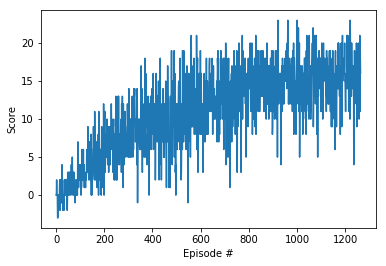

In [6]:
def dqn(n_episodes=10000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    #def dqn(n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    print(type(env_info))
    print(dir(env_info))
    #state = env_info.vector_observations[0]            # get the current state
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]  
        score = 0
        for t in range(max_t):            
            action = agent.act(state, eps)            
            env_info = env.step(action)[brain_name]             
            next_state = env_info.vector_observations[0] 
            reward = env_info.rewards[0] 
            done = env_info.local_done[0]           
            agent.getConsequence(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=16.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

The scores are getting bigger and bigger for more and more learned Episode. This shows that the agent is doing better, at least during the training.
We are not yet sure the performance of the trained agent on unknown world. We will explore the unknown world in the below code. 

To show the performance of the trained agent against random agent, the following two cells are implemented. The first cells shows the 
performance of a random agent. The secound code show perfomance of the trained agent. One can see the score different when the episode ended.

### random agent

In [7]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)                     # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    #print(type(env_info))
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### Deep Q Network trained agent

In [8]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    #print(type(env_info))
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 20.0


When finished, you can close the environment.

In [9]:
#env.close()

In [10]:
agent.save_model('/home/peerajak/udacity_deepReinforcement/homework/deep-reinforcement-learning/p1_navigation/checkpoint.pth')

In [11]:
agent2 = Agent(brain.vector_observation_space_size, brain.vector_action_space_size, seed=1)
agent2.load_model('/home/peerajak/udacity_deepReinforcement/homework/deep-reinforcement-learning/p1_navigation/checkpoint.pth')

In [12]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent2.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    #print(type(env_info))
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 18.0
